# Library Imports

In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
sns.set_context("notebook", font_scale=1.5)

# Load the dataset
#file_path = 'C:/Users/pc/Desktop/politecnico/b-FINTECH/business cases/Fintech_BC/BC4/data/Dataset4_EWS.xlsx'
file_path = './data/Dataset4_EWS.xlsx'

## Data Loading

In [2]:
# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Load the data from the Excel file
data_df = pd.read_excel(file_path, sheet_name='Markets') # First sheet: Market data
metadata_df = pd.read_excel(file_path, sheet_name='Metadata') # Second sheet: Metadata

# Check the structure of the loaded data
print("Data columns:", data_df.columns.tolist())

# Extract date and anomaly label columns
date_col = 'Date' if 'Date' in data_df.columns else data_df.columns[0]
y_col = 'Y' if 'Y' in data_df.columns else None

# Convert dates to datetime format
data_df[date_col] = pd.to_datetime(data_df[date_col], dayfirst=True)  # Date format is dd/mm/yy

# Set date as index
data_df = data_df.set_index(date_col)

# Extract features (all columns except Y if it exists)
if y_col:
    X_df = data_df.drop(y_col, axis=1)
    y = data_df[y_col].values
else:
    X_df = data_df
    y = None

# Display basic information about the dataset
print(f"Data shape: {X_df.shape}")
print(f"Total number of records: {len(X_df)}")
print(f"Time period: from {X_df.index.min().strftime('%m/%d/%Y')} to {X_df.index.max().strftime('%m/%d/%Y')}")
print(f"Frequency: {pd.infer_freq(X_df.index) or 'Weekly'}")
print(f"Number of variables: {X_df.shape[1]}")
if y_col:
    print(f"Number of anomalies: {np.sum(y == 1)} ({np.mean(y == 1)*100:.2f}%)")

# Create a more comprehensive metadata table with additional statistics
enhanced_metadata = []

# Determine the correct column names for ticker and description
ticker_col = 'ticker' if 'ticker' in metadata_df.columns else metadata_df.columns[0]
desc_col = 'description' if 'description' in metadata_df.columns else metadata_df.columns[1] if len(metadata_df.columns) > 1 else ticker_col

for ticker in X_df.columns:
    # Get metadata for this ticker if available
    meta_row = metadata_df[metadata_df[ticker_col] == ticker] if ticker in metadata_df[ticker_col].values else pd.DataFrame()

    # Get description or use ticker if not found
    description = meta_row[desc_col].values[0] if not meta_row.empty and desc_col in meta_row.columns else ticker

    # Calculate statistics for this series
    series = X_df[ticker]

    enhanced_metadata.append({
        'Ticker': ticker,
        'Description': description,
        'Mean': series.mean(),
        'Std.Dev': series.std(),
        'Min': series.min(),
        'Max': series.max(),
        'Missing values': series.isna().sum(),
        'Missing (%)': f"{series.isna().mean()*100:.2f}%"
    })

# Create enhanced metadata dataframe
enhanced_meta_df = pd.DataFrame(enhanced_metadata)

# Display the enhanced metadata
print("\nMetadata and statistics:")
display(enhanced_meta_df)


Data columns: ['Data', 'BDIY', 'CRY', 'Cl1', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GBP', 'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'JPY', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'US0001M', 'USGG2YR', 'USGG30YR', 'USGG3M', 'VIX', 'XAUBGNL', 'Y']
Data shape: (1111, 42)
Total number of records: 1111
Time period: from 01/11/2000 to 04/20/2021
Frequency: W-TUE
Number of variables: 42
Number of anomalies: 237 (21.33%)

Metadata and statistics:


,Ticker,Description,Mean,Std.Dev,Min,Max,Missing values,Missing (%)
0,BDIY,Baltic Dry Index,2259.860486,2017.811888,291.00000,11793.00000,0,0.00%
1,CRY,TR/CC CRB ER Index,245.247649,68.278081,106.29290,467.57000,0,0.00%
2,Cl1,Generic 1st 'CL' Future,60.708101,25.900813,10.01000,140.97000,0,0.00%
3,DXY,DOLLAR INDEX SPOT,90.934982,11.379095,71.32900,119.82000,0,0.00%
4,ECSURPUS,Bloomberg ECO US Surprise Inde,0.036153,0.349453,-0.97400,0.99100,0,0.00%
5,EMUSTRUU,EM USD Aggregate,704.379495,309.951768,230.52670,1286.35300,0,0.00%
6,EONIA,EMMI EURO OverNight Index Aver,1.363676,1.721894,-0.49800,5.73000,0,0.00%
7,GBP,British Pound Spot,1.569618,0.212340,1.17230,2.08520,0,0.00%
8,GT10,US TREASURY N/B,3.266748,1.332464,0.50800,6.74800,0,0.00%
9,GTDEM10Y,BUNDESREPUB. DEUTSCHLAND,2.448365,1.851558,-0.79400,5.64400,0,0.00%


# Data Preprocessing

In [3]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Extract columns related to indices and currencies
indices_currencies = [col for col in X_df.columns if col in [
    'XAUBGNL', 'BDIY', 'CRY', 'Cl1', 'DXY', 'EMUSTRUU', 'GBP', 'JPY', 'LF94TRUU',
    'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU',
    'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'VIX'
]]

# Extract columns related to interest rates
interest_rates = [col for col in X_df.columns if col in [
    'EONIA', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y',
    'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR',
    'US0001M', 'USGG3M', 'USGG2YR', 'GT10', 'USGG30YR'
]]

#############################################################################
###################### Create stationary data ###############################
#############################################################################

# Create a new dataframe for stationary data
stationary_df = pd.DataFrame(index=X_df.index[1:])

# Apply log-differences to indices and currencies (always positive)
for col in indices_currencies:
    if col in X_df.columns:
        stationary_df[col] = np.diff(np.log(X_df[col]))

# Apply first differences to interest rates (can be negative or very close to 0)
for col in interest_rates:
    if col in X_df.columns:
        stationary_df[col] = np.diff(X_df[col])

# Keep Bloomberg Economic US Surprise Index as is (already stationary)
if 'ECSURPUS' in X_df.columns:
    stationary_df['ECSURPUS'] = X_df['ECSURPUS'].values[1:]

# Adjust the response variable to match the new data length
if y is not None:
    y_stationary = y[1:]
else:
    y_stationary = None

# Convert to numpy arrays for easier manipulation
X = stationary_df.values
y = y_stationary

# Reshuffle the data (this will break down autocorrelation)
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

# Separate normal and anomalous examples
X_normal = X_shuffled[y_shuffled == 0]
X_anomaly = X_shuffled[y_shuffled == 1]

# Training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (888, 42)
Testing data shape: (222, 42)


# Plot data density 

We plot the data density and the density of the log-differences the see if we can see any pattern to better understand how to classify the data.

In [4]:
# plt.figure(figsize=(20, 40))
# # Calculate the number of rows and columns for the subplot grid
# num_cols = 4
# num_rows = -(-len(stationary_df.columns) // num_cols)  # Ceiling division

# # For each column in the stationary dataframe, plot separate histograms for y=0 and y=1
# for i, col in enumerate(stationary_df.columns):
#     if col != 'y':  # Skip the target column itself
#         plt.subplot(num_rows, num_cols, i + 1)
        
#         # Class 0 (blue)
#         plt.hist(stationary_df[y_stationary == 0][col].dropna(), 
#                  bins=30, color='blue', alpha=0.5, label='y=0', density = True)
        
#         # Class 1 (red)
#         plt.hist(stationary_df[y_stationary == 1][col].dropna(), 
#                  bins=30, color='red', alpha=0.5, label='y=1', density = True)
        
#         plt.title(col)
#         plt.xlabel('Value')
#         plt.ylabel('Frequency')
#         plt.legend()

# plt.tight_layout()  # Adjust layout to prevent overlap
# plt.show()

In [5]:
# print("X_df shape", X_df.shape)

# plt.figure(figsize=(20, 40))
# # Calculate the number of rows and columns for the subplot grid
# num_cols = 4
# num_rows = -(-len(X_df.columns) // num_cols)  # Ceiling division
# y = data_df[y_col].values
# X_df = data_df.drop(y_col, axis=1)


# # For each column in the stationary dataframe, plot separate histograms for y=0 and y=1
# for i, col in enumerate(X_df.columns):
#     if col != 'y':  # Skip the target column itself
#         plt.subplot(num_rows, num_cols, i + 1)
        
#         # Class 0 (blue)
#         plt.hist(X_df[y == 0][col].dropna(), 
#                  bins=30, color='blue', alpha=0.5, label='y=0', density = True)
        
#         # Class 1 (red)
#         plt.hist(X_df[y == 1][col].dropna(), 
#                  bins=30, color='red', alpha=0.5, label='y=1', density = True)
        
#         plt.title(col)
#         plt.xlabel('Value')
#         plt.ylabel('Frequency')
#         plt.legend()

# plt.tight_layout()  # Adjust layout to prevent overlap
# plt.show()

As we can see, doesn't show a clear pattern to classify the data.

# Bayesian Neural Network (BNN)

## What is a BNN?
A Bayesian Neural Network (BNN) is a type of neural network that incorporates Bayesian inference into its architecture. Unlike traditional neural networks, which provide point estimates for weights and biases, BNNs treat these parameters as probability distributions. This allows BNNs to quantify uncertainty in their predictions, making them particularly useful in scenarios where data is noisy or to better understand the model's confidence in its predictions.

## Why use a BNN?
1. **Uncertainty Quantification**: BNNs provide a measure of uncertainty in predictions, which is crucial in many applications, such as our case since both by the legislator and by the stake-holders we need to understand the uncertainty of the model.
2. **Robustness to Overfitting**: By treating weights as distributions, BNNs can be more robust to overfitting, especially in cases with limited data.
3. **Incorporation of Prior Knowledge**: BNNs allow the incorporation of prior knowledge into the model, which can be beneficial in scenarios where data is scarce or noisy.

In [6]:
# Importing necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score
from scipy import stats

Our implementation of a BNN is based on the following classes:

## BayesianLayer Class
A custom linear layer implementing Bayesian neural network functionality with support for various activation functions and batch normalization.

### Initialization Parameters
- **in_features**: Number of input features
- **out_features**: Number of output features
- **dropout_prob**: Dropout probability (default: 0.1)
- **activation**: Choice of activation function ('relu', 'leaky_relu', 'selu', 'gelu', 'swish')
- **use_batch_norm**: Flag to enable/disable batch normalization

## ResidualBlock Class
Implements a residual connection block using two BayesianLayers for improved training stability.

### Architecture
Consists of:
- Two identical BayesianLayers
- Residual connection around the block
- Optional batch normalization and dropout

## BayesianNN Class
Full Bayesian neural network implementation with configurable architecture and residual connections.

### Configuration Options
- **input_dim**: Input feature dimensionality
- **hidden_dims**: List of hidden layer dimensions
- **dropout_probs**: List of dropout probabilities per layer
- **activation**: Global activation function choice
- **use_batch_norm**: Flag for batch normalization
- **use_residual**: Flag to enable/disable residual connections

## CosineWarmupScheduler Class
Custom learning rate scheduler combining linear warmup with cosine annealing decay.

### Parameters
- **optimizer**: PyTorch optimizer instance
- **warmup_epochs**: Number of epochs for linear warmup phase
- **max_epochs**: Total number of training epochs
- **eta_min**: Minimum learning rate multiplier (default: 0)
- **last_epoch**: Starting epoch index (default: -1)


In [7]:
class BayesianLayer(nn.Module):
    def __init__(self, in_features, out_features, dropout_prob=0.1, activation='gelu', use_batch_norm=True):
        super(BayesianLayer, self).__init__()

        # Layer initialization
        self.linear = nn.Linear(in_features, out_features)
        self.dropout = nn.Dropout(dropout_prob)
        self.use_batch_norm = use_batch_norm
        
        # Batch normalization is applied only if specified
        if use_batch_norm:
            self.batch_norm = nn.BatchNorm1d(out_features)
        
        # Activation function selection
        if activation == 'relu':
            self.activation = F.relu
        elif activation == 'leaky_relu':
            self.activation = F.leaky_relu
        elif activation == 'selu':
            self.activation = F.selu
        elif activation == 'gelu':
            self.activation = F.gelu
        elif activation == 'swish':
            self.activation = lambda x: x * torch.sigmoid(x)
        else:
            self.activation = F.gelu  # Default 
            
        # Initialize weights with He initialization for better gradient flow
        nn.init.kaiming_uniform_(self.linear.weight)
        
    def forward(self, x):
        x = self.linear(x)
        if self.use_batch_norm:
            if len(x.shape) == 2:
                x = self.batch_norm(x)
            else:
                # Handle case when batch size is 1 during inference
                x = x.unsqueeze(0) if len(x.shape) == 1 else x
                x = self.batch_norm(x)
                x = x.squeeze(0) if len(x.shape) == 3 else x
        x = self.activation(x)
        x = self.dropout(x)
        return x

class ResidualBlock(nn.Module):
    def __init__(self, features, dropout_prob=0.1, activation='gelu', use_batch_norm=True):
        super(ResidualBlock, self).__init__()

        # Initialize two Bayesian layers with skip connection
        self.layer1 = BayesianLayer(features, features, dropout_prob, activation, use_batch_norm)
        self.layer2 = BayesianLayer(features, features, dropout_prob, activation, use_batch_norm)
        
    def forward(self, x):
        residual = x
        out = self.layer1(x)
        out = self.layer2(out)
        out += residual  # Skip connection
        return out

class BayesianNN(nn.Module):
    def __init__(self, input_dim, hidden_dims=[32, 64, 64, 32], dropout_probs=[0.1, 0.2, 0.2, 0.1], 
                 activation='gelu', use_batch_norm=True, use_residual=True):
        super(BayesianNN, self).__init__()
        
        self.use_residual = use_residual
        self.layers = nn.ModuleList()
        
        # Input layer
        self.layers.append(BayesianLayer(input_dim, hidden_dims[0], 
                                        dropout_probs[0], activation, use_batch_norm))
        
        # Hidden layers with potential residual connections
        for i in range(1, len(hidden_dims)):
            if use_residual and hidden_dims[i] == hidden_dims[i-1]:
                self.layers.append(ResidualBlock(hidden_dims[i-1], dropout_probs[i], 
                                                activation, use_batch_norm))
            else:
                self.layers.append(BayesianLayer(hidden_dims[i-1], hidden_dims[i], 
                                                dropout_probs[i], activation, use_batch_norm))
        
        # Output layer
        self.output_layer = nn.Linear(hidden_dims[-1], 1)
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        x = torch.sigmoid(self.output_layer(x))
        return x
    
    def predict_with_uncertainty(self, x, num_samples=100):
        # Enable dropout for prediction to simulate MC Dropout
        self.train()
        
        predictions = []
        for _ in range(num_samples):
            with torch.no_grad():
                pred = self(x)
                predictions.append(pred)
        
        # Stack all predictions
        stacked_preds = torch.stack(predictions, dim=1)
        
        # Calculate mean and standard deviation over samples
        mean_pred = torch.mean(stacked_preds, dim=1, keepdim=True)
        std_pred = torch.std(stacked_preds, dim=1, keepdim=True)
        
        return mean_pred, std_pred, stacked_preds

# Learning rate scheduler
class CosineWarmupScheduler(optim.lr_scheduler._LRScheduler):
    def __init__(self, optimizer, warmup_epochs, max_epochs, eta_min=0, last_epoch=-1):
        self.warmup_epochs = warmup_epochs
        self.max_epochs = max_epochs
        self.eta_min = eta_min
        super(CosineWarmupScheduler, self).__init__(optimizer, last_epoch)
        
    def get_lr(self):
        if self.last_epoch < self.warmup_epochs:
            # Linear warmup
            alpha = self.last_epoch / self.warmup_epochs
            return [base_lr * alpha for base_lr in self.base_lrs]
        else:
            # Cosine annealing
            progress = (self.last_epoch - self.warmup_epochs) / (self.max_epochs - self.warmup_epochs)
            cosine_decay = 0.5 * (1 + np.cos(np.pi * progress))
            return [self.eta_min + (base_lr - self.eta_min) * cosine_decay for base_lr in self.base_lrs]
        


In [32]:
def train_and_evaluate_improved_bnn(X, y, hidden_dims=[32, 64, 64, 32],
                                  dropout_probs=[0.1, 0.2, 0.2, 0.1], 
                                  activation='gelu', use_batch_norm=True, use_residual=True,
                                  epochs=300, batch_size=32, lr=0.001, weight_decay=1e-4,
                                  warmup_epochs=30, class_weights=None, patience = 200, seed = 42):
    """
    Train and evaluate an Improved Bayesian Neural Network
    """
    # Ensure y is binary and has the right format
    y = y.astype(int)
    
    # Split data - stratify to handle class imbalance
    X_train, X__val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.5, random_state=seed, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X__val_test, y_val_test, test_size=0.3, random_state=seed, stratify=y_val_test)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_tensor = torch.FloatTensor(y_val).reshape(-1, 1)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

    # Create data loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    # Initialize model
    input_dim = X_train.shape[1]
    bnn_model = BayesianNN(input_dim, hidden_dims, dropout_probs, 
                                  activation, use_batch_norm, use_residual)

    # Define loss function with class weights if provided
    if class_weights is not None:
        # Calculate class weights if not provided
        if class_weights == 'auto':
            counts = np.bincount(y_train.astype(int))
            class_weights = torch.FloatTensor([1.0, counts[0] / counts[1]])  # Inverse frequency
        else:
            class_weights = torch.FloatTensor(class_weights)
        criterion = nn.BCEWithLogitsLoss()  # Will apply weights manually
    else:
        criterion = nn.BCEWithLogitsLoss()

    # Define optimizer with weight decay (L2 regularization)
    optimizer = optim.AdamW(bnn_model.parameters(), lr=lr, weight_decay=weight_decay)
    
    # Learning rate scheduler
    scheduler = CosineWarmupScheduler(optimizer, warmup_epochs, epochs, eta_min=lr/10)

    # Training loop
    train_losses = []
    val_losses = []
    val_f1_scores = []
    best_val_f1 = 0
    min_val_loss = float('inf')
    patience_counter = 0
    best_model = None
    
    for epoch in range(epochs):
        bnn_model.train()
        epoch_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = bnn_model(batch_X)
            
            # Apply class weights if needed
            if class_weights is not None:
                batch_weights = torch.ones_like(batch_y)
                for i in range(len(class_weights)):
                    batch_weights[batch_y == i] = class_weights[i]
                loss = F.binary_cross_entropy(outputs, batch_y, weight=batch_weights)
            else:
                loss = criterion(outputs, batch_y)
                
            loss.backward()
            
            # Gradient clipping to prevent exploding gradients
            torch.nn.utils.clip_grad_norm_(bnn_model.parameters(), max_norm=1.0)
            
            optimizer.step()
            epoch_loss += loss.item()
        
        # Update learning rate
        scheduler.step()
        
        # Track losses
        train_losses.append(epoch_loss / len(train_loader))

        # Validation step
        bnn_model.eval()
        with torch.no_grad():
            val_preds = []
            val_targets = []
            val_loss = 0
            
            for batch_X, batch_y in val_loader:
                logits = bnn_model(batch_X)
                outputs = torch.sigmoid(logits)
                loss = criterion(logits, batch_y).mean()
                val_loss += loss.item()
                
                val_preds.append(outputs.numpy())
                val_targets.append(batch_y.numpy())
            
            val_losses.append(val_loss / len(val_loader))
            
            # Calculate validation F1 score
            val_preds_np = np.vstack(val_preds)
            val_targets_np = np.vstack(val_targets)
            
            # Find optimal threshold for F1 on validation set
            thresholds = np.linspace(0.1, 0.9, 100)
            f1_scores = []
            
            for threshold in thresholds:
                y_pred = (val_preds_np > threshold).astype(int).flatten()
                f1 = f1_score(val_targets_np.flatten(), y_pred)
                f1_scores.append(f1)
            
            current_best_f1 = max(f1_scores)
            val_f1_scores.append(current_best_f1)
    
        # Advanced early stopping based on F1 score
        if current_best_f1 > best_val_f1:
            best_val_f1 = current_best_f1
            # Save the best model
            best_model = bnn_model.state_dict().copy()
            patience_counter = 0
            if best_val_f1 > 0.8: # avoid a lot of messages
                print(f"New best validation F1: {best_val_f1:.4f} at epoch {epoch+1}")
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}. Best validation F1: {best_val_f1:.4f}")
                break
                
        # Print progress
        if (epoch + 1) % 50 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {train_losses[-1]:.4f}, '
                f'Val Loss: {val_losses[-1]:.4f}, Val F1: {current_best_f1:.4f}, '
                f'LR: {optimizer.param_groups[0]["lr"]:.6f}')
                
        # Restore the best model
        if best_model is not None:
            bnn_model.load_state_dict(best_model)

    # Restore the best model
    if best_model is not None:
        bnn_model.load_state_dict(best_model)

    # Plot training loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot learning rate
    lr_history = []
    dummy_scheduler = CosineWarmupScheduler(optimizer, warmup_epochs, epochs, eta_min=lr/10)
    for i in range(epochs):
        lr_history.append(dummy_scheduler.get_lr()[0])
        dummy_scheduler.step()
        
    plt.subplot(1, 2, 2)
    plt.plot(lr_history)
    plt.title('Learning Rate Schedule')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Make predictions with uncertainty
    bnn_model.eval()  # This won't disable dropout for uncertainty estimation
    mean_pred, std_pred, all_pred_samples = bnn_model.predict_with_uncertainty(X_test_tensor, num_samples=100)

    # Convert to numpy
    mean_pred_np = mean_pred.numpy()
    std_pred_np = std_pred.numpy()
    all_samples_np = all_pred_samples.numpy()

    # Calculate optimal threshold for F1 score (instead of default 0.5)
    thresholds = np.linspace(0.1, 0.9, 2000)
    f1_scores = []
    for threshold in thresholds:
        y_pred = (mean_pred_np > threshold).astype(int).flatten()
        f1 = f1_score(y_test.flatten(), y_pred)
        f1_scores.append(f1)
    
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    print(f"Optimal threshold for F1 score: {optimal_threshold:.3f}")
    
    # Convert probabilities to class labels with optimal threshold
    y_pred_class = (mean_pred_np > optimal_threshold).astype(int).flatten()
    
    # Ensure y_test is flattened as well for proper comparison
    y_test_flat = y_test.flatten()

    # Calculate metrics
    accuracy = accuracy_score(y_test_flat, y_pred_class)
    prec = precision_score(y_test_flat, y_pred_class)
    rec = recall_score(y_test_flat, y_pred_class)
    f1 = f1_score(y_test_flat, y_pred_class)
    conf_matrix = confusion_matrix(y_test_flat, y_pred_class)
    
    print(f"Test accuracy: {accuracy:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix: \n{conf_matrix}")

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test_flat, mean_pred_np.flatten())
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 10))
    
    # ROC curve
    plt.subplot(2, 2, 1)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # F1 Score vs Threshold
    plt.subplot(2, 2, 2)
    plt.plot(thresholds, f1_scores)
    plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal = {optimal_threshold:.2f}')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs Threshold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Uncertainty vs. error correlation
    errors = np.abs(y_test_flat - mean_pred_np.flatten())
    plt.subplot(2, 2, 3)
    plt.scatter(std_pred_np.flatten(), errors, alpha=0.5)
    plt.xlabel('Predictive Uncertainty (std)')
    plt.ylabel('Absolute Error')
    plt.title('Uncertainty vs Error Correlation')
    plt.grid(True, alpha=0.3)

    # f1 score vs epoch 
    plt.subplot(2, 2, 4)
    plt.plot(val_f1_scores)
    plt.xlabel('Epoch')
    plt.ylabel('Validation F1 Score')
    plt.title('Validation F1 Score vs Epoch')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
        
    return bnn_model, scaler, optimal_threshold

Epoch 50/1500, Loss: 0.6152, Val Loss: 0.6983, Val F1: 0.7456, LR: 0.001500
Epoch 100/1500, Loss: 0.5661, Val Loss: 0.6883, Val F1: 0.7712, LR: 0.003000
Epoch 150/1500, Loss: 0.5031, Val Loss: 0.6787, Val F1: 0.7515, LR: 0.002992
Epoch 200/1500, Loss: 0.5521, Val Loss: 0.6774, Val F1: 0.7802, LR: 0.002966
New best validation F1: 0.8025 at epoch 223
Epoch 250/1500, Loss: 0.4486, Val Loss: 0.6835, Val F1: 0.7750, LR: 0.002924
New best validation F1: 0.8133 at epoch 296
Epoch 300/1500, Loss: 0.4353, Val Loss: 0.6858, Val F1: 0.7561, LR: 0.002866
Epoch 350/1500, Loss: 0.4572, Val Loss: 0.6662, Val F1: 0.7947, LR: 0.002793
Epoch 400/1500, Loss: 0.3482, Val Loss: 0.6720, Val F1: 0.7898, LR: 0.002705
New best validation F1: 0.8258 at epoch 433
Epoch 450/1500, Loss: 0.3770, Val Loss: 0.6635, Val F1: 0.8028, LR: 0.002605
Epoch 500/1500, Loss: 0.2749, Val Loss: 0.6641, Val F1: 0.7836, LR: 0.002492
New best validation F1: 0.8289 at epoch 548
Epoch 550/1500, Loss: 0.3525, Val Loss: 0.6681, Val F1:

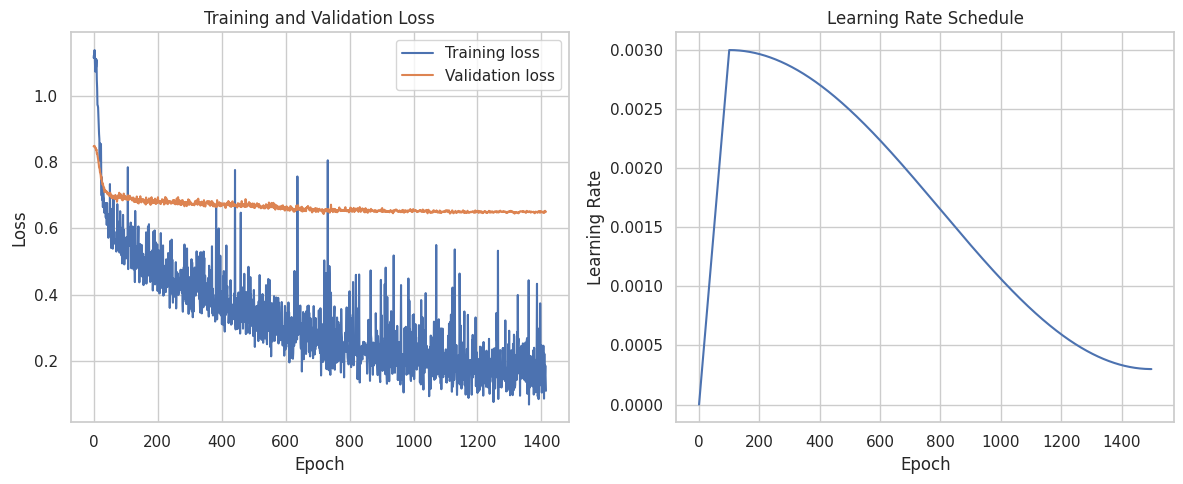

Optimal threshold for F1 score: 0.310
Test accuracy: 0.9521
Precision: 0.9118
Recall: 0.8611
F1 Score: 0.8857
Confusion Matrix: 
[[128   3]
 [  5  31]]


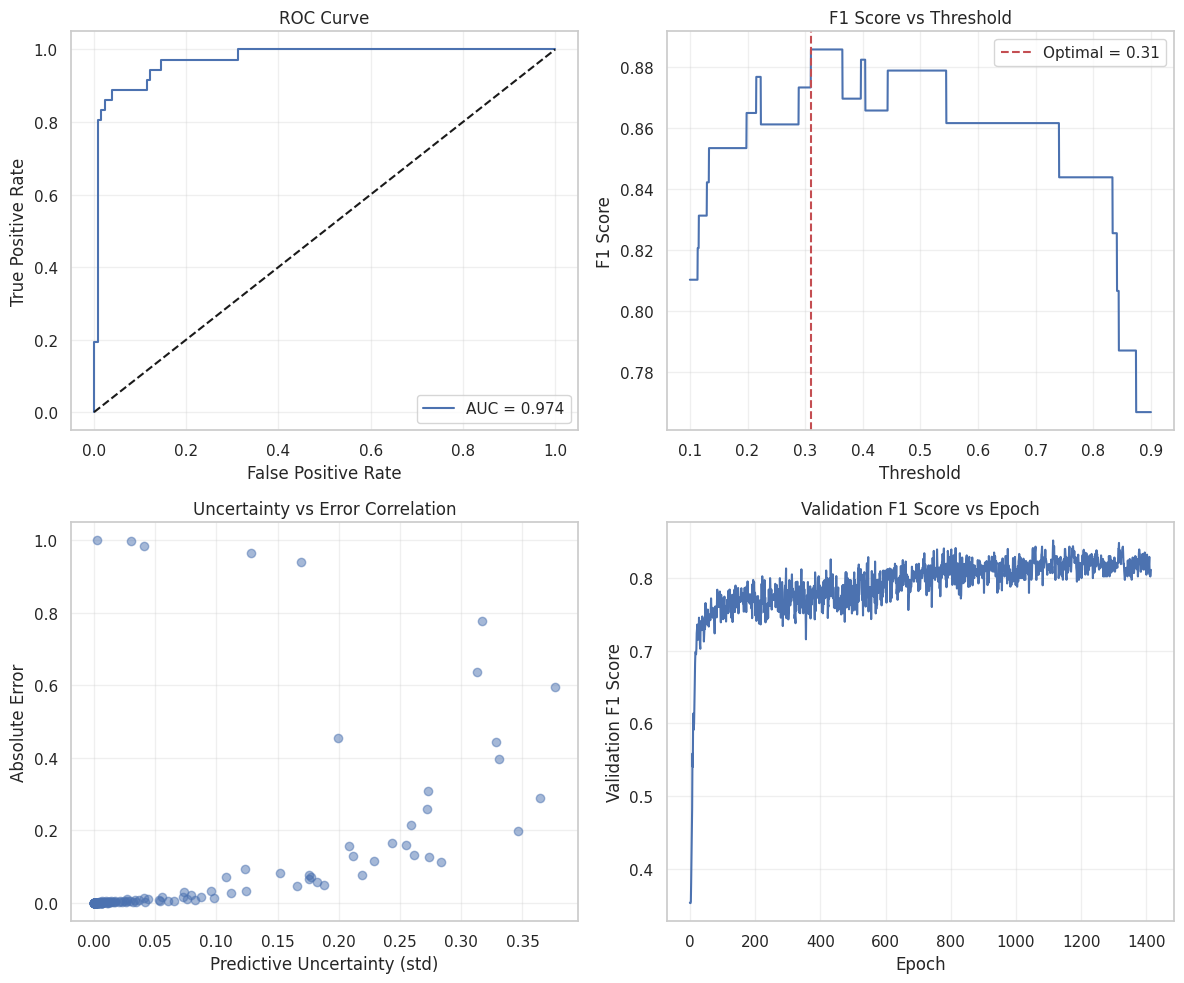

BNN training and evaluation complete.


In [33]:
X = data_df.drop(y_col, axis=1).values
y = data_df[y_col].values

model, scaler, threshold = train_and_evaluate_improved_bnn(
    X, y,
    hidden_dims=[32, 64, 128, 256, 128, 64, 32],  # Deeper network with varying widths
    dropout_probs=[0.1, 0.2, 0.3, 0.4, 0.3, 0.2, 0.1],  # Varying dropout rates
    activation='gelu',  # Modern activation function
    use_batch_norm=True,  # Use batch normalization
    use_residual=True,  # Use residual connections
    epochs=1500,
    batch_size=32,
    lr=0.003,
    weight_decay=1e-4,  # L2 regularization
    warmup_epochs=100,
    class_weights='auto',  # Automatically handle class imbalance
    patience = 300,
)

print("BNN training and evaluation complete.")